In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 256

In [6]:
trainset = torchvision.datasets.CIFAR10(
    root='../data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

170499072it [03:53, 730772.50it/s]                                


Extracting ../data/cifar-10-python.tar.gz to ../data


In [8]:
testset = torchvision.datasets.CIFAR10(
    root='../data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

Files already downloaded and verified


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

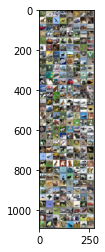

In [13]:
imshow(torchvision.utils.make_grid(images))

In [14]:
print(" ".join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

bird  plane cat   car   dog   frog  dog   cat   horse horse plane deer  cat   car   frog  cat   truck car   deer  horse cat   ship  truck plane frog  car   truck truck bird  dog   plane dog   bird  truck truck cat   frog  plane dog   truck horse frog  frog  frog  plane frog  frog  ship  truck car   plane deer  car   bird  car   dog   deer  horse dog   cat   frog  truck ship  dog   deer  bird  truck truck deer  bird  car   frog  ship  bird  cat   plane plane horse ship  car   horse dog   truck plane car   cat   dog   bird  ship  truck horse plane dog   cat   frog  plane dog   car   frog  truck horse horse deer  dog   plane truck horse cat   horse ship  plane truck frog  truck frog  horse dog   dog   plane bird  cat   cat   bird  cat   truck bird  ship  cat   dog   bird  horse bird  bird  frog  cat   bird  frog  dog   dog   dog   plane plane plane car   deer  dog   deer  ship  bird  cat   truck ship  dog   plane horse plane bird  dog   bird  car   cat   horse deer  horse ship  frog  cat 

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Net().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [ ]:
for epoch in range(20):
    running_loss = 0.0
    model.train()

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inpust)